In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

/Users/koala/Documents/deeplearning.info/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 8.91k/8.91k [00:00<00:00, 10.4MB/s]

Extracting files...
Path to dataset files: /Users/koala/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [2]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(f"{path}" + "/diabetes.csv", sep=",", names=col_names, skiprows=1)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']

In [6]:
import matplotlib.pyplot as plt
import numpy as np

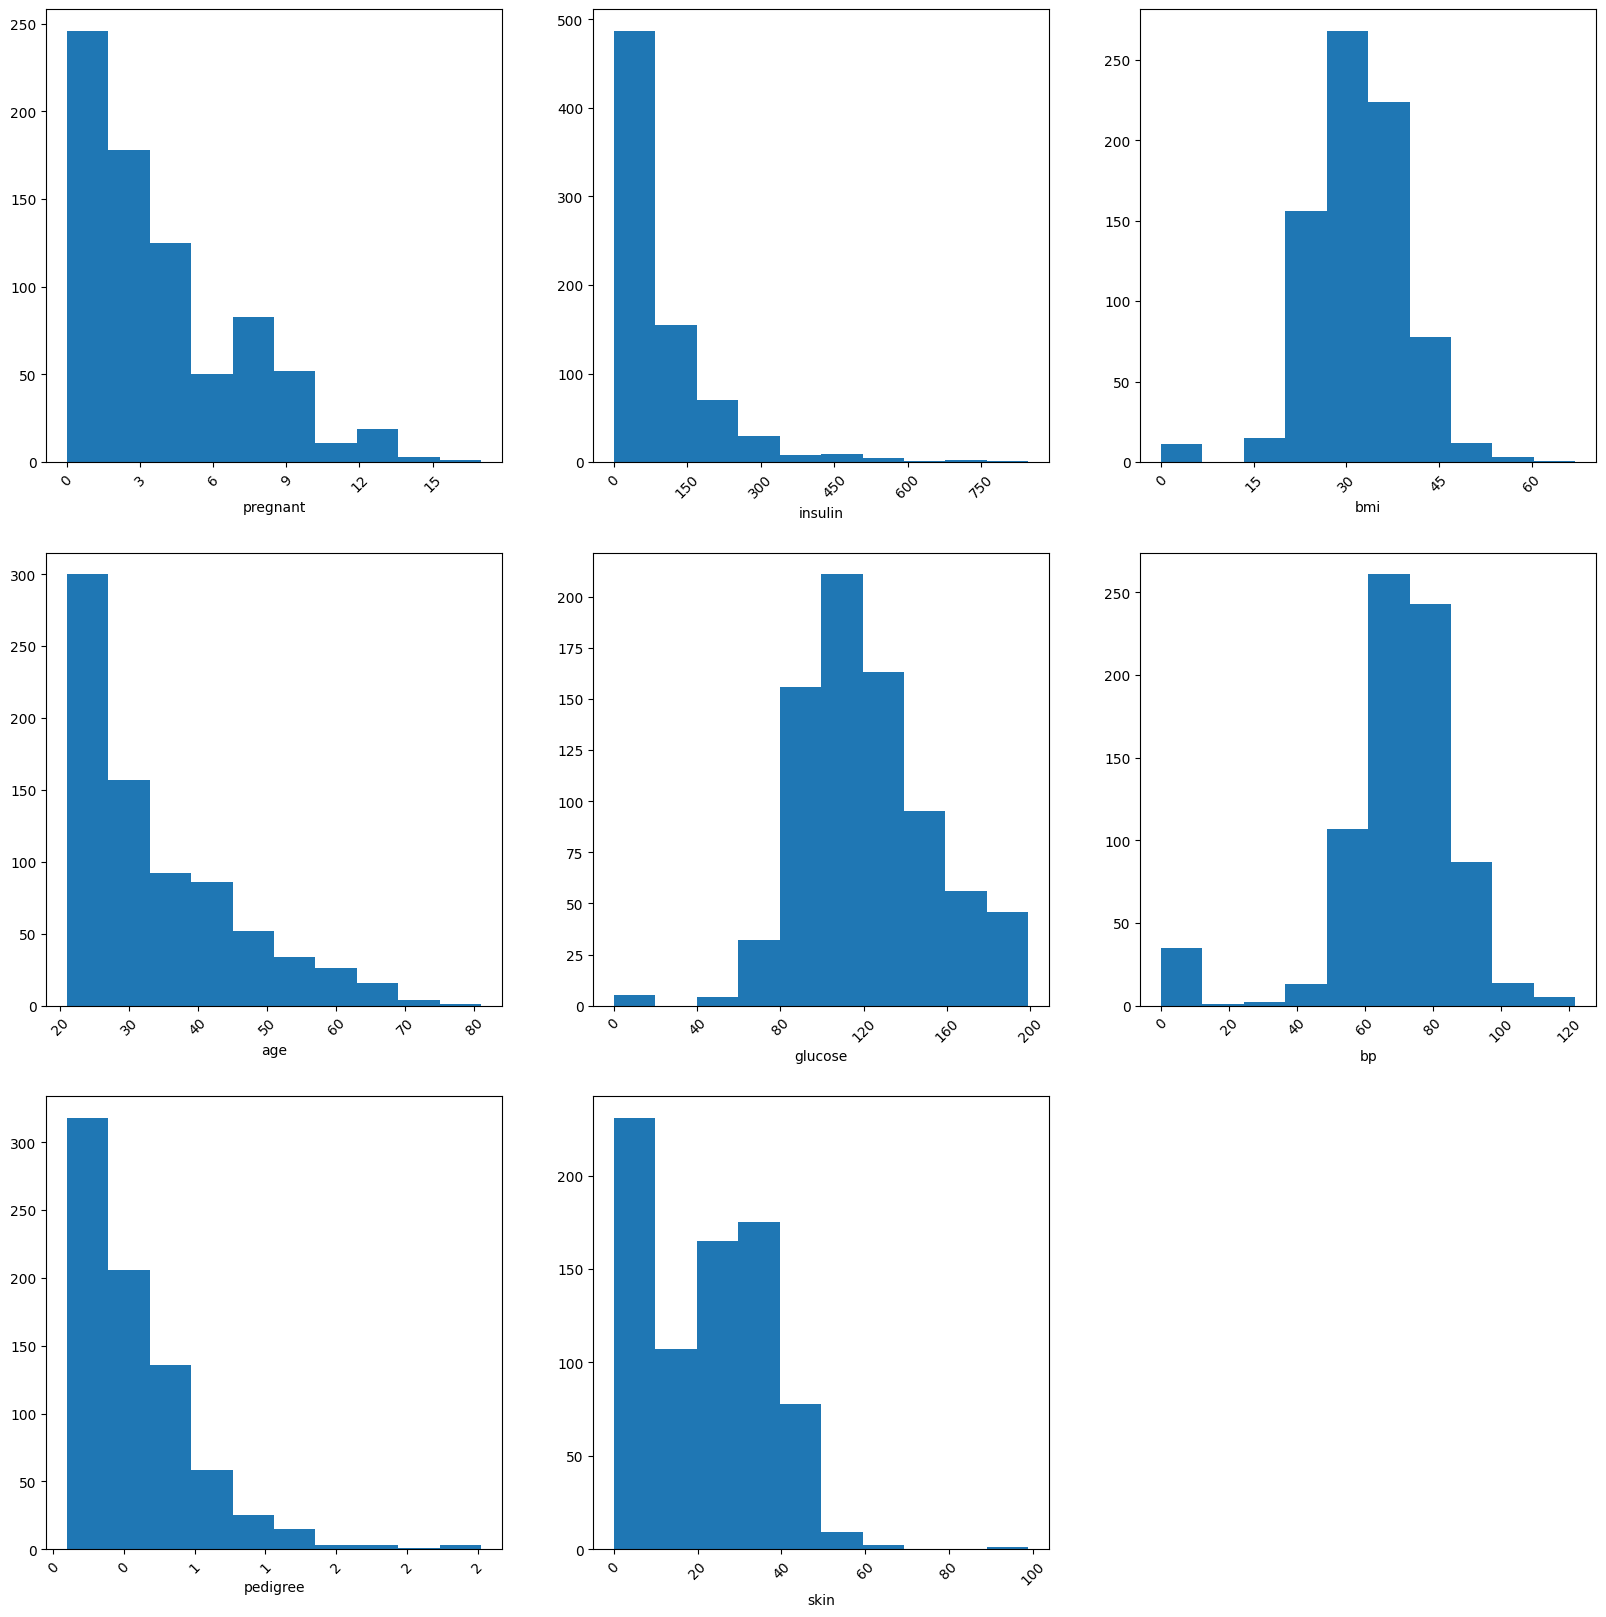

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()
for n, col in enumerate(feature_cols):
    ax = axes[n]
    ax.hist(pima[col])
    ax.set_xlabel(col)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}'))
        
    ax.tick_params(axis='x', rotation=45)

plt.delaxes(plt.subplot(3, 3, 9))
plt.show()

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

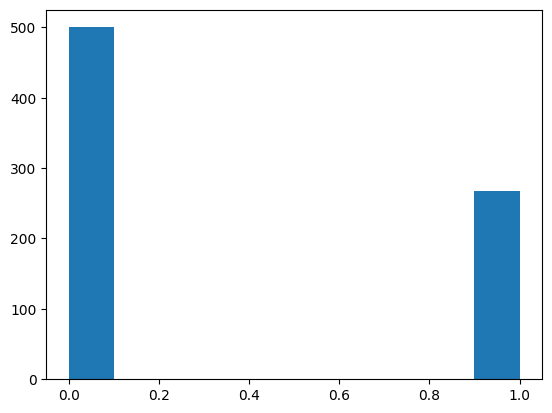

In [8]:
plt.hist(pima['label'])

In [9]:
# Find columns with zero counts
data_nan_count = pima[feature_cols].isna().sum()
print(data_nan_count)

pregnant    0
insulin     0
bmi         0
age         0
glucose     0
bp          0
pedigree    0
skin        0
dtype: int64


In [131]:
# There are null values in the data. Filling them with nan
pima[feature_cols] = pima[feature_cols].replace(0, np.nan)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6.0,148.0,72.0,35,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,0,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35,168.0,43.1,2.288,33,1


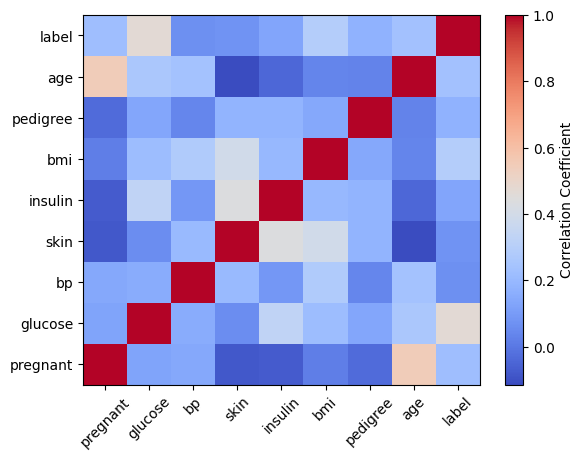

In [11]:
# How to fill Nan, draw a corelation matrix or a heatmap and observe values and fill
co_matrix = pima.corr()
im = plt.imshow(co_matrix, cmap='coolwarm', aspect='auto', origin='lower')
plt.colorbar(im, label='Correlation Coefficient')
plt.xticks(np.arange(len(col_names)), col_names, rotation=45)
plt.yticks(np.arange(len(col_names)), col_names)
plt.show()

In [12]:
# Filling  zeroes as of insulin columns with the median
def median(var):
    temp = pima[pima[var].notnull()]
    temp = temp[[var, 'label']].groupby(['label'])[[var]].median().reset_index()
    return temp


zero_fill_cols = ['insulin', 'bmi', 'bp', 'glucose'] # ignoring skin as number of zeroes are more, cannot be normalised and correlation is not great.
for col in zero_fill_cols:
    med = median(col)
    pima.loc[(pima['label']==0)&(pima[col].isnull()), col] = med[col][0]
    pima.loc[(pima['label']==1)&(pima[col].isnull()), col] = med[col][1]

In [13]:
feature_cols = feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

In [ ]:
class LogisticRegression:
    def __init__(self):
        self.w = np.random.randn(len(feature_cols)) * 0.01
        self.b = 0.1
    
    def _sigmod(self, z):
        return 1/(1 + np.exp(-z))

    def forward(self, X):
        y_pred = np.dot(X, self.w) + self.b
        y_pred = self._sigmod(y_pred)
        return y_pred

    def loss(self, y_pred, y_expected):
        epsilon = 1e-9 # used to avoid log 0 cases
        y1 = y_expected * np.log(y_pred + epsilon)
        y2 = (1-y_expected)* np.log(1-y_pred + epsilon)
        return -np.mean(y1+y2)
    
    def backward(self, X, y_pred, y, lr = 0.0001):
        dz = y_pred - y
        dw = (1/len(X))*np.dot(X.T,dz)
        db = (1/len(X)) * np.sum(dz)
        self.w -= lr * dw
        self.b -= lr * db
        return 
    
    def predict(self, X):
        threshold = .5
        y_pred = self.forward(X)
        y_pred = [0 if i < threshold else 1 for i in y_pred]
        return y_pred

In [91]:
lr = LogisticRegression()
df = pima[feature_cols]
y = pima['label']

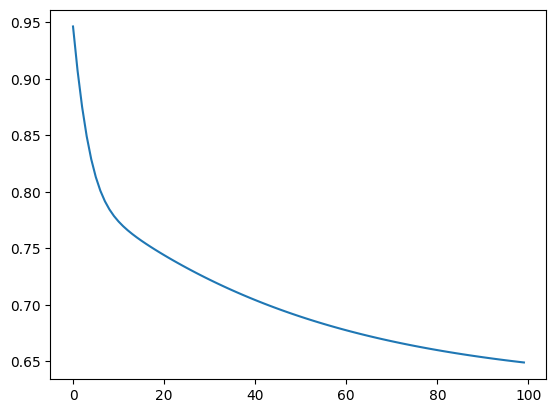

In [92]:
losses = []
for i in range(100):
    y_pred = lr.forward(df)
    losses.append(lr.loss(y_pred, y))
    lr.backward(df, y_pred, y)

plt.plot(range(len(losses)), losses)
plt.show()

In [97]:
print("predicted label:", lr.predict(df.iloc[[1]]))
print(pima.iloc[1])

predicted label: [0]
pregnant     1.000
glucose     85.000
bp          66.000
skin        29.000
insulin      0.000
bmi         26.600
pedigree     0.351
age         31.000
label        0.000
Name: 1, dtype: float64


In [98]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
logreg = LogisticRegression()

In [102]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [103]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[87, 11],
       [31, 25]])

In [104]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.74      0.89      0.81        98
   with diabetes       0.69      0.45      0.54        56

        accuracy                           0.73       154
       macro avg       0.72      0.67      0.67       154
    weighted avg       0.72      0.73      0.71       154



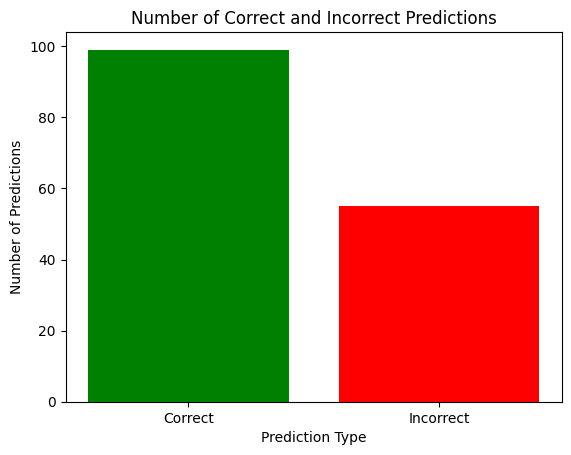

In [124]:
import matplotlib.pyplot as plt

correct_predictions = (y_pred == y_test).sum()
incorrect_predictions = (y_pred != y_test).sum()

labels = ['Correct', 'Incorrect']
values = [correct_predictions, incorrect_predictions]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Prediction Type')
plt.ylabel('Number of Predictions')
plt.title('Number of Correct and Incorrect Predictions')
plt.show()

In [125]:
import torch
import torch.nn as nn

In [126]:
class logisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(logisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

In [128]:
model = logisticRegression(7,1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0005)

In [129]:
for epoch in range(100):
    inputs = torch.Tensor(X_train.values).requires_grad_()
    labels = torch.tensor(y_train.values, dtype=torch.float32)

    optimizer.zero_grad()
    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch%10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 7.880999565124512
epoch 10, loss 5.063413143157959
epoch 20, loss 2.0479304790496826
epoch 30, loss 1.854238748550415
epoch 40, loss 1.7285534143447876
epoch 50, loss 1.6219090223312378
epoch 60, loss 1.5312886238098145
epoch 70, loss 1.4535561800003052
epoch 80, loss 1.3871861696243286
epoch 90, loss 1.3300442695617676


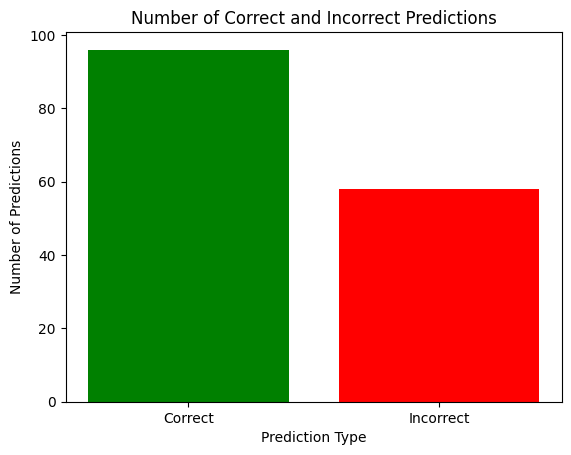

In [130]:
predicted = model(torch.Tensor(X_test.values).requires_grad_()).data.numpy().flatten()
predicted_labels = (predicted > 0.5).astype(int)
correct_predictions = (predicted_labels == y_test.values).sum()
incorrect_predictions = (predicted_labels != y_test.values).sum()

labels = ['Correct', 'Incorrect']
values = [correct_predictions, incorrect_predictions]

plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Prediction Type')
plt.ylabel('Number of Predictions')
plt.title('Number of Correct and Incorrect Predictions')
plt.show()